# Loading and exploring spring parking brake data

## Systembeschreibung

Das zu betrachtende System ist ein Federspeicherbremszylinder, also ein Bremszylinder, der ohne angelegten Luftdruck die Bremse anlegt. Abhängig von der Federspeicherkraft kann das Fahrzeug (bspw. eine Lokomotive mit vier Federspeichern pro Fahrzeug) im Gefälle stationär gehalten werden oder nicht.

Die 24 Federn pro Zylinder verhalten sich näherungsweise linear, weisen jedoch eine recht große Streuung der Federrate auf. Sie sind zusammen mit einigen geometrischen Größen für die Kraft verantwortlich:

- Force/N: gemessene Kraft des Federspeichers
- Deviation $d$/mm: Abweichung der Dicke des Kolben (Abweichung nach unten: weniger Kraft)
- Deviation $h_{1}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Deviation $h_{2}$/mm: Abweichung der Lage der Bohrung des Hammerheads (Abweichung nach unten: weniger Kraft)
- Dev. $l$/mm: Abweichung der Länge der Kolbenstange (Abweichung nach unten: weniger Kraft)

Zusätzlich haben die Daten noch Datum und Zeit der Messung.

## Aufgabe

Nach dem Auftreten eines Fehlers im Feld (Fahrzeug bricht trotz angelegtem Federspeicher los, Mindestkraft von 18 kN unterschritten) bekommt ihr aus der Produktion eures Unternehmens die Messdaten aus einer Schicht.

Analysiert die Daten und beantwortet die Fragestellungen: 

- Handelt es sich um ein systematisches Problem?
- Wie viele Einheiten sind betroffen?
- Lässt sich das Problem auf einzelne Maße eingrenzen?

In [4]:
# OS to use file system 1
import os
# Matplotlib and the pyplot module for a Matlab-like plot syntax
import matplotlib
# This is the syntax to import as a named module
import matplotlib.pyplot as plt
# Pandas is a module for rectangular data "dataframe"
import pandas as pd
# Special module for a very quick analysis
from pandas.plotting import scatter_matrix
# Plot the graphs in the notebook
%matplotlib inline

## Data import

In [5]:
# Import the csv-data to pandas dataframe (canonical name df)
df = pd.read_csv(os.path.join("SpringPBData.csv"))
# Display the first lines of the df
df.head()

,Time,F,d,h1,h2,l
0,2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
1,2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2,2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
3,2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
4,2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


In [6]:
# Transform first column from string to datetimeindex
df.set_index(pd.to_datetime(df["Time"]), inplace = True)
# Delete second ocurrence of time
df.drop("Time", axis = 1, inplace = True)
df.head()

,F,d,h1,h2,l
Time,,,,,
2022-10-26 07:30:00,18905.806965,0.005124,-0.047404,-0.031544,0.015860
2022-10-26 07:32:00,20026.385396,0.048496,0.008175,-0.014790,-0.022965
2022-10-26 07:34:00,19874.917201,-0.013561,0.046190,0.001044,-0.045146
2022-10-26 07:36:00,18058.438190,0.048965,-0.026648,-0.072617,-0.045969
2022-10-26 07:38:00,18187.872511,0.034729,-0.017012,-0.063248,-0.046235


---

# Euer Bericht "Mangelnde Federspeicherkraft an Lokomotive ABC-123 während Federspeicherprüfung"

## Fragestellung

## Analyse

was ist ein systematisches Problem?

Systematische Probleme zeichnen sich dadurch aus, dass sie nicht isolierte Vorfälle sind, sondern auf grundlegenden Struktur- oder Prozessproblemen im System beruhen. Solche Probleme neigen dazu, sich regelmäßig zu wiederholen oder auf verschiedene Weisen in Erscheinung zu treten. Die Lösung solcher Probleme erfordert oft eine gründliche Analyse der zugrunde liegenden Strukturen, Prozesse oder Mechanismen, die das System ausmachen.

Betrachtung der Daten:

<Figure size 1000x600 with 0 Axes>

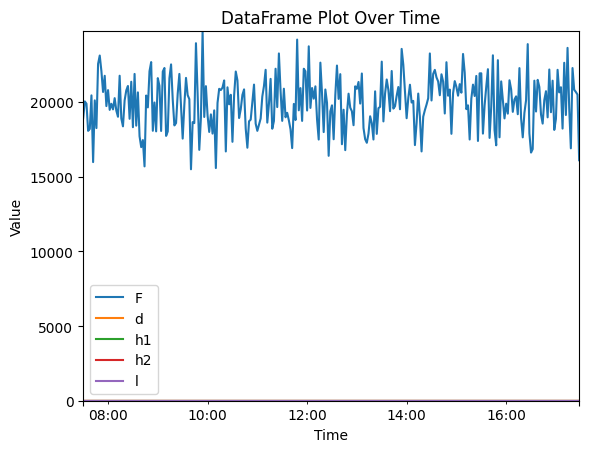

In [10]:
plt.figure(figsize=(10, 6))
df.plot()
plt.title('DataFrame Plot Over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Set axis limits based on the data
plt.xlim(df.index.min(), df.index.max())
plt.ylim(df.min().min(), df.max().max())

plt.legend(loc='best')
plt.show()

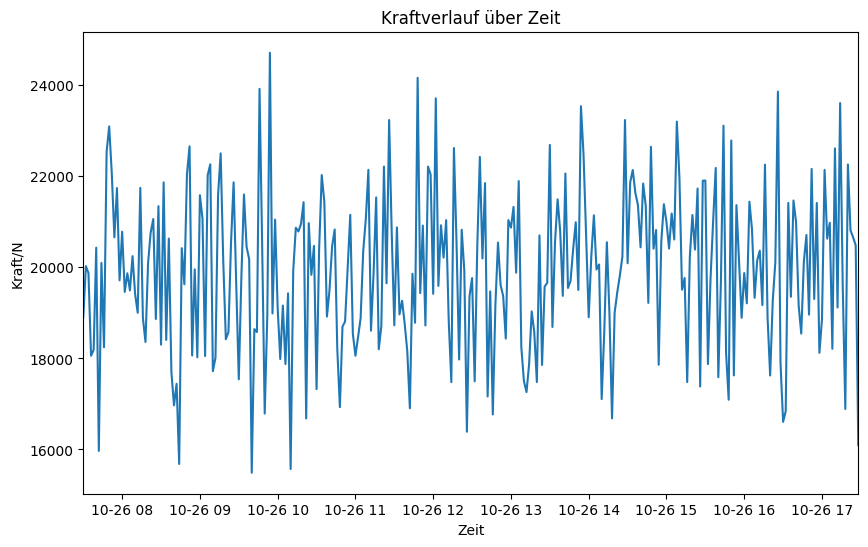

In [14]:
# Plotting the 'f' column over time with axis limits set based on data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.plot(df.index, df['F'])
plt.title('Kraftverlauf über Zeit')
plt.xlabel('Zeit')
plt.ylabel('Kraft/N')

# Set x-axis limits based on the data
plt.xlim(df.index.min(), df.index.max())

plt.show()


Index(['F', 'd', 'h1', 'h2', 'l'], dtype='object')


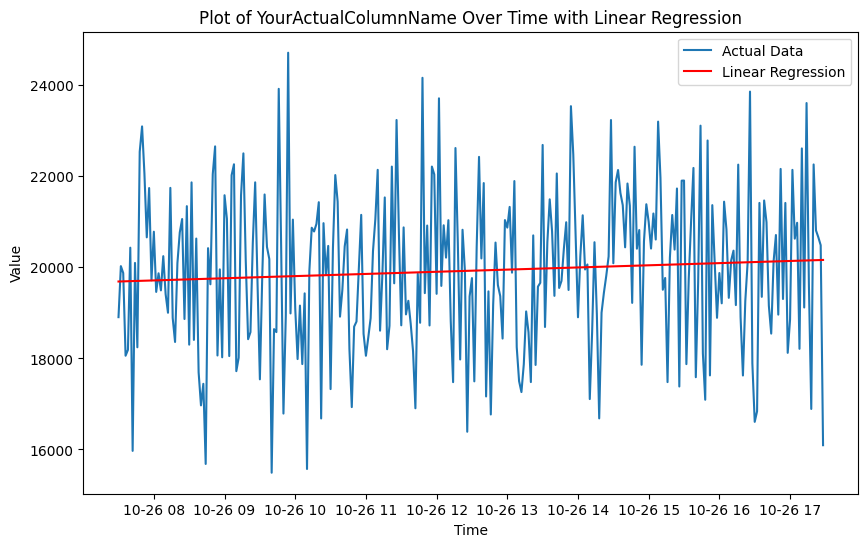

In [17]:
import numpy as np
from scipy.stats import linregress

# Print column names to identify the correct column name
print(df.columns)

# Choose the correct column name for 'x' and 'y' based on your data
x = df.index
y = df['F']  # Replace 'YourActualColumnName' with the correct column name

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x=np.arange(len(y)), y=y)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Actual Data')

# Plotting the linear regression line
plt.plot(x, intercept + slope * np.arange(len(y)), 'r', label='Linear Regression')

plt.title('Plot of YourActualColumnName Over Time with Linear Regression')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Index(['F', 'd', 'h1', 'h2', 'l'], dtype='object')


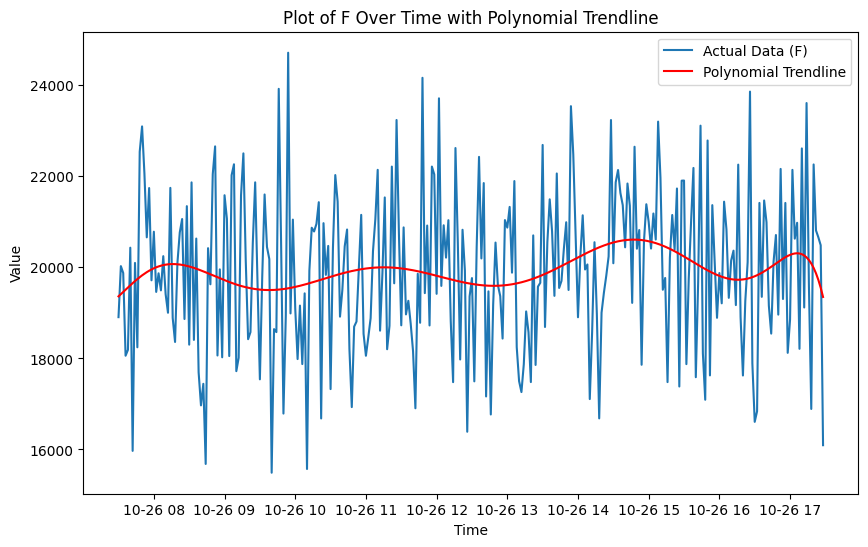

In [36]:
import numpy as np

# Print column names to identify the correct column name
print(df.columns)

# Choose the correct column name for 'x' and 'y' based on your data
x = df.index
y_column_name = 'F'  # Replace 'YourActualColumnName' with the correct column name
y = df[y_column_name]

# Fit a polynomial of degree 2 (you can change the degree as needed)
coefficients = np.polyfit(x=np.arange(len(y)), y=y, deg=9)

# Generate y values for the polynomial fit
poly_fit_y = np.polyval(coefficients, np.arange(len(y)))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Actual Data ({y_column_name})')

# Plotting the polynomial trendline
plt.plot(x, poly_fit_y, 'r', label='Polynomial Trendline')

plt.title(f'Plot of {y_column_name} Over Time with Polynomial Trendline')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


In [5]:
import pandas as pd

# Lese die CSV-Datei ein
csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
daten = pd.read_csv(csv_datei)

# Extrahiere die Spalte F und zähle die Werte unter 18000
anzahl_unter_18000 = daten['F'].lt(18000).sum()

# Gib das Ergebnis aus
print(f"Anzahl der Werte unter 18000 in Spalte F: {anzahl_unter_18000}")

Anzahl der Werte unter 18000 in Spalte F: 42


In [19]:
import pandas as pd

# Lese die CSV-Datei ein
csv_datei = 'SpringPBData.csv'  # Passe den Dateinamen an
daten = pd.read_csv(csv_datei)

# Wähle die relevanten Spalten aus
interessante_spalten = ['l', 'h1', 'h2', 'd', 'F']
daten_relevant = daten[interessante_spalten]

# Erstelle die Korrelationsmatrix
korrelationsmatrix = daten_relevant.corr()

# Gib die Korrelationsmatrix aus
print("Korrelationsmatrix:")
print(korrelationsmatrix)


Korrelationsmatrix:
           l        h1        h2         d         F
l   1.000000 -0.012566  0.699381 -0.004543  0.645387
h1 -0.012566  1.000000  0.705904  0.016781  0.667759
h2  0.699381  0.705904  1.000000  0.008777  0.934486
d  -0.004543  0.016781  0.008777  1.000000  0.325720
F   0.645387  0.667759  0.934486  0.325720  1.000000


## Ergebnis